# Metropolis-vs-Hastings
A comparison of different acceptance functions

**Imports:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import re
from os import listdir
from os.path import isfile, join

**Data Retrieval:**
    
Insert local path to your Results folder here:

In [2]:
path = "C:\\Path\\to\\folder\\containing\\the\\results\\" # TODO FILL IN THE LOCAL PATH

In [3]:
robot_files =  [f for f in listdir(path + "robot\\")  if isfile(join(path + "robot\\", f))]
pixel_files =  [f for f in listdir(path + "pixel\\")  if isfile(join(path + "pixel\\", f))]
string_files = [f for f in listdir(path + "string\\") if isfile(join(path + "string\\", f))]

In [4]:
robot_data = []
for file in robot_files:
    with open(path + 'robot\\' + file, 'r') as f:
      l = json.loads(f.readlines()[-1])
      if ('domain' in l.keys() and l['domain'] == "robot"):
            robot_data.append(l)
    
    
    
pixel_data = []
for file in pixel_files:
    with open(path + 'pixel\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "pixel"):
            pixel_data.append(l)

string_data = []
for file in string_files:
    with open(path + 'string\\' + file, 'r') as f:
        l = json.loads(f.readlines()[-1])
        if ('domain' in l.keys() and l['domain'] == "string"):
            string_data.append(l)

## Print Data

In [5]:

print("\nCases solved (Robot):")
for x in robot_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + x['cases_solved'])

print("\nCases solved (Pixel):")
for x in pixel_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + x['cases_solved'])
    
print("\nCases solved (String):")
for x in string_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + x['cases_solved'])

print("\nExecution Time (Robot):")
for x in robot_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['execution_time']))

print("\nExecution Time (Pixel):")
for x in pixel_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['execution_time']))
    
print("\nExecution Time (String):")
for x in string_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['execution_time']))

print("\nExecution Time (Robot):")
for x in robot_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['program_length']))

print("\nExecution Time (Pixel):")
for x in pixel_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['program_length']))
    
print("\nExecution Time (String):")
for x in string_data:
    print("alpha=" + str(x['params']['alpha']) + "\t: " + str(x['average_correct']['program_length']))




Cases solved (Robot):
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)
alpha=1	: 550 / 550 (100.0%)

Cases solved (Pixel):
alpha=1	: 10 / 500 (2.0%)
alpha=1	: 89 / 500 (17.8%)
alpha=1	: 0 / 500 (0.0%)

Cases solved (String):
alpha=1	: 3295 / 19295 (17.1%)
alpha=1	: 1926 / 19295 (10.0%)
alpha=1	: 872 / 19295 (4.5%)

Execution Time (Robot):
alpha=1	: 0.3777301160672725
alpha=1	: 0.012679726985454548
alpha=1	: 0.014190685887272719

Execution Time (Pixel):
alpha=1	: 32.25831165720002
alpha=1	: 15.720886263449438
alpha=1	: 0

Execution Time (String):
alpha=1	: 2.7874079027341327
alpha=1	: 3.690685691794894
alpha=1	: 0.25834347218119785

Execution Time (Robot):
alpha=1	: 22.912727272727246
alpha=1	: 75.78000000000007
alpha=1	: 92.92000000000002

Execution Time (Pixel):
alpha=1	: 28.0
alpha=1	: 129.66292134831468
alpha=1	: 0

Execution Time (String):
alpha=1	: 25.36115326251886
alpha=1	: 48.4402907580479
alpha=1	: 54.87041284403671


## Plot Data

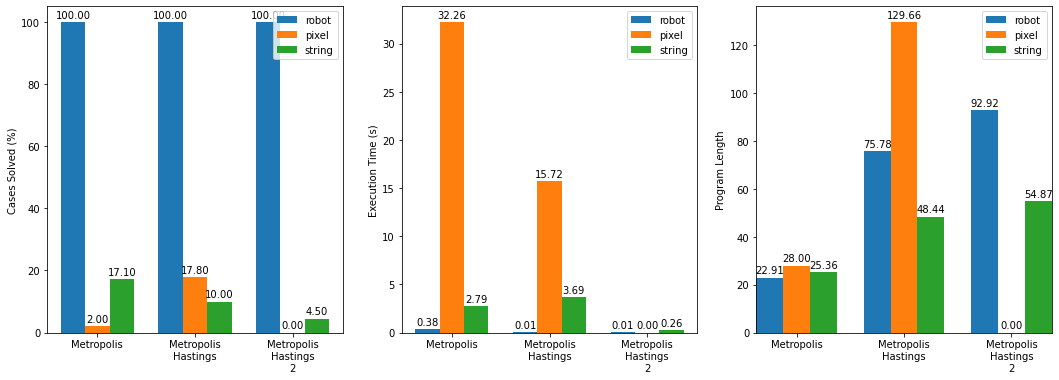

In [6]:
data = [robot_data, pixel_data, string_data]
fig, axs = plt.subplots(1, 3, figsize=(18,6))    

N = 3
width = 0.25
ind = np.arange(N)

for j in range(len(data)): # Add data for each domain
    d = data[j]
    xs = [re.sub("_", "\n", i['params']['type']).title() for i in d]
    ys0 = [float(re.match(".*\((.*)%\).*$", j['cases_solved']).group(1)) for j in d]
    ys1 = [j['average_correct']['execution_time'] for j in d]
    ys2 = [j['average_correct']['program_length'] for j in d]
    ys = [ys0, ys1, ys2]
    ylabels = ["Cases Solved (%)", "Execution Time (s)", "Program Length"]
    
    for i in range(3): # Create 1 graph per metric
        axs[i].bar(ind + j * width, ys[i], width, label=d[0]['domain'])# + " -> " + str('%.1g' % a))
        axs[i].set(xticks=ind+width, xticklabels=xs)
        axs[i].legend()
        axs[i].set_ylabel(ylabels[i])
        
        for x,y in zip(list(ind),np.array(ys).T.tolist()):
                axs[i].annotate("{:.2f}".format(float(y[i])), # this is the text
                         (x + j*width,y[i]), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,4), # distance from text to points (x,y)
                         ha='center')

fig.gca().autoscale(enable=True, axis='x', tight=True)

In [7]:
#Default Weights

default = {
    "add_token_random": 30,
    "remove_token_random": 30,
    "add_loop_random": 30,
    "add_if_statement_random": 30,
    "start_over": 6
}
